Clean and Analyze Employee Exit Surveys

In this project, we'll clean and analyze exit surveys from employees of the Department of Education, Training and Employment (DETE)}) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. The TAFE exit survey can be found here and the survey for the DETE can be found here.

We'll pretend our stakeholders want us to combine the results for both surveys to answer the following question:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

In [ ]:
#Importing Libraries for Analysis

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#importing dataset 

In [4]:
dataset = pd.read_csv('exitsurvey.csv')

In [5]:
dataset

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [ ]:
#running code to determine number of entries

In [44]:
dataset.shape

(822, 56)

In [ ]:
#we have 46032 entries in the dataset

In [ ]:
#running code to call all columns in the dataset

In [45]:
dataset.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [ ]:
#Getting all information relating to the dataset

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [ ]:
#Checking our dataset for missing values

In [47]:
dataset.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [ ]:
#Calling the first 10 rows in the dataset

In [48]:
dataset.head(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Calling the last 10 rows in the dataset

In [49]:
dataset.tail(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
812,814,Age Retirement,01/2014,1998,2005,Teacher,Secondary,Not Stated,NaN,Permanent Full-time,...,A,N,SA,Male,61 or older,NaN,NaN,NaN,NaN,NaN
813,815,Age Retirement,11/2013,1995,2007,Public Servant,AO5-AO7,North Coast,NaN,Permanent Full-time,...,D,D,A,Female,56-60,NaN,NaN,NaN,NaN,NaN
814,816,Age Retirement,11/2013,Not Stated,Not Stated,Cleaner,NaN,Not Stated,NaN,Permanent Full-time,...,SA,SA,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012,2012,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,SA,SA,SA,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012,2012,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,A,N,A,Female,21-25,NaN,NaN,NaN,NaN,NaN
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,Not Stated,Not Stated,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rename Columns

Next, we'll standardize the names of the columns we want to work with.

In [50]:
dataset.rename(columns = {'Cease Date':'Cease_Date', 'DETE Start Date':'DETE_Start_Date', 'Role Start Date':'Role_Start_Date', }, inplace = True)

In [51]:
dataset

,ID,SeparationType,Cease_Date,DETE_Start_Date,Role_Start_Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [52]:
dataset.columns

Index(['ID', 'SeparationType', 'Cease_Date', 'DETE_Start_Date',
       'Role_Start_Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [53]:
dataset.describe()

,ID
count,822.000000
mean,411.693431
std,237.705820
min,1.000000
25%,206.250000
50%,411.500000
75%,616.750000
max,823.000000


In [ ]:
#finding the mode of all columns in the dataset

In [54]:
dataset.mode()

,ID,SeparationType,Cease_Date,DETE_Start_Date,Role_Start_Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,...,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818,820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#replacing 'Not Stated' entris with NaN

Identify Missing Values and Drop Unneccessary Columns
First, we'll correct the Not Stated values and drop some of the columns we don't need for our analysis.

In [55]:
dataset.replace(r'Not Stated', np.nan, inplace=True)

In [56]:
dataset

,ID,SeparationType,Cease_Date,DETE_Start_Date,Role_Start_Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [ ]:
#filling the missing NaN values with 0

In [58]:
dataset.fillna(0, inplace=True)

In [59]:
dataset

,ID,SeparationType,Cease_Date,DETE_Start_Date,Role_Start_Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,0,0,0,0,Yes
1,2,Voluntary Early Retirement (VER),08/2012,0,0,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,0,0,0,0,0
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,0,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,0,0,0,0,0
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,0,Permanent Full-time,...,A,N,A,Female,36-40,0,0,0,0,0
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,0,South East,0,Permanent Full-time,...,N,A,M,Female,61 or older,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,0,Permanent Part-time,...,A,A,SA,Female,56-60,0,0,0,0,0
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,0,Permanent Full-time,...,N,N,N,Male,51-55,0,0,0,0,0
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,0,0,0,0,0
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,0,Permanent Full-time,...,A,N,A,Female,41-45,0,0,0,0,0


In [ ]:
#calling dataset to confirm no missing entries

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease_Date                           822 non-null    object
 3   DETE_Start_Date                      822 non-null    object
 4   Role_Start_Date                      822 non-null    object
 5   Position                             822 non-null    object
 6   Classification                       822 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        822 non-null    object
 9   Employment Status                    822 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [ ]:
#selecting valid rows and columns and counting the number of entries

Filter the Data
For this project, we'll only analyze survey respondents who resigned, so we'll only select separation types containing the string 'Resignation'.

In [61]:
dataset['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [63]:
dataset['Position'].value_counts()

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Other                                                        7
Professional Officer                                         7
0                                                            5
School Based Professional Staff (Therapist, nurse, etc)      5
School Principal                                             5
Deputy Principal                                             4
Business Service Manager                               

Verify the Data


Below, we clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense. We'll use the following criteria:

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [62]:
dataset['Cease_Date'].value_counts()

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
0           34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2014      2
08/2012      2
07/2014      2
02/2014      2
04/2013      2
07/2012      1
11/2012      1
2010         1
07/2006      1
2014         1
09/2014      1
09/2010      1
Name: Cease_Date, dtype: int64

In [72]:
dataset['Role_Start_Date'].value_counts()

0       98
2012    65
2011    57
2010    46
2008    45
2007    41
2013    41
2009    38
2006    25
2004    22
2000    20
2005    20
2003    20
1996    19
1999    19
1989    18
1992    17
2002    16
2001    15
1998    15
1988    14
1997    13
1995    13
1975    12
1990    12
1986    11
1978     9
1976     9
1993     9
1991     8
1994     7
1979     7
1985     6
1987     5
1983     5
1981     5
1982     4
1984     4
1980     3
1970     2
1977     2
1971     1
1973     1
1972     1
1974     1
200      1
Name: Role_Start_Date, dtype: int64

In [64]:
dataset['Lack of recognition'].value_counts()

False    765
True      57
Name: Lack of recognition, dtype: int64

In [77]:
dataset['Lack of job security'].value_counts()

False    794
True      28
Name: Lack of job security, dtype: int64

In [65]:
dataset['Employment conditions'].value_counts()

False    788
True      34
Name: Employment conditions, dtype: int64

In [66]:
dataset['Workload'].value_counts()

False    735
True      87
Name: Workload, dtype: int64

In [67]:
dataset['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
0                 11
20 or younger      1
Name: Age, dtype: int64

In [68]:
dataset['Gender'].value_counts()

Female    573
Male      225
0          24
Name: Gender, dtype: int64

In [69]:
dataset['Work life balance'].value_counts()

False    605
True     217
Name: Work life balance, dtype: int64

In [70]:
dataset['Maternity/family'].value_counts()

False    760
True      62
Name: Maternity/family, dtype: int64

In [81]:
import matplotlib.pyplot as plt

In [ ]:
#Visualization of The Seperation type column

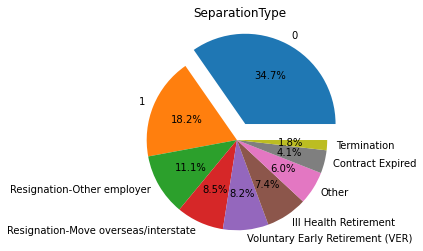

In [4]:
labels=['0','1','Resignation-Other employer','Resignation-Move overseas/interstate','Voluntary Early Retirement (VER)','Ill Health Retirement','Other','Contract Expired','Termination']
sizes=[285,150,91,70,67,61,49,34,15]
separated=(0.2,0,0,0,0,0,0,0,0)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=separated)
plt.title('SeparationType')
plt.axis('equal')
plt.show()

In [ ]:
#Visualization of Position column

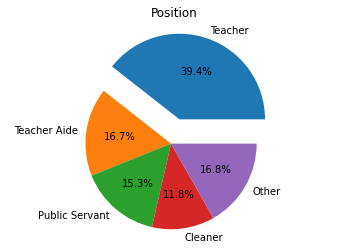

In [152]:
labels=['Teacher','Teacher Aide','Public Servant','Cleaner','Other']
sizes=[324,137,126,97,138]
separated=(0.3,0,0,0,0)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=separated)
plt.title('Position')
plt.axis('equal')
plt.show()

In [ ]:
#Visualization of The Cease Date column

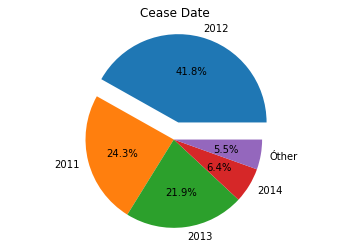

In [155]:
labels=['2012','2011','2013','2014','Óther']
sizes=[344,200,180,53,45]
separated=(0.2,0,0,0,0)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=separated)
plt.title('Cease Date')
plt.axis('equal')
plt.show()

In [ ]:
#Visualization of The Role Start Date column

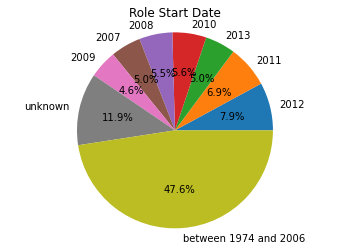

In [159]:
labels=['2012','2011','2013','2010','2008','2007','2009','unknown','between 1974 and 2006']
sizes=['65','57','41','46','45','41','38','98','391']
separated=(0,0,0,0,0,0,0,0,0)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=separated)
plt.title('Role Start Date')
plt.axis('equal')
plt.show()

In [160]:
#End of Analysis and Visualization.